In [100]:
from datascience import*
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import matplotlib.pylab as plt
%matplotlib inline

from scipy import special

ModuleNotFoundError: No module named 'datascience'

## Swain vs. Alabama ##

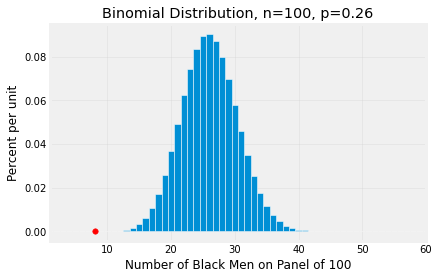

In [27]:
k = np.arange(101)
p = special.comb(100, k)*(0.26**k)*(0.74**(100-k))

fig, ax = plt.subplots()

ax.bar(k, p, width=1, ec='white');
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
plt.xlim(1,60)
plt.title("Binomial Distribution, n=100, p=0.26");
plt.xlabel("Number of Black Men on Panel of 100")
plt.ylabel("Percent per unit")
plt.scatter(8, -.0001, color="red", s=30)


In [32]:
#Hypothesis Test:  
# Null:  p=0.26
# Alternative  p<0.26


# (1) Calculate the p-value: probability of region beyond observed value
p[0:9].sum()


# (2) See if this is less than 1% (or your pre-chosen significance level)

4.734794997889318e-06

In [ ]:
#Conclusion:  since p<0.01, we reject the null hypothesis at the 1% significance level

## Mendel and Pea Flowers ##

In [87]:
#Simulate one value of the test statistic under the null hypothesis:  .75% chance of purple flowers out of sample of 929

predicted_proportions = np.array([.75, .25])

def test_statistic_purple_flowers(n=929):
    num_purple=sum(np.random.choice(["W","P"],size=n,p=[.25, .75]) =="P")
    #print("Number of purple flowers out of 929:",num_purple)
    return abs(num_purple/n*100-75)

test_statistic_purple_flowers()

0.3498385360602754

Text(0, 0.5, 'Percent per unit')

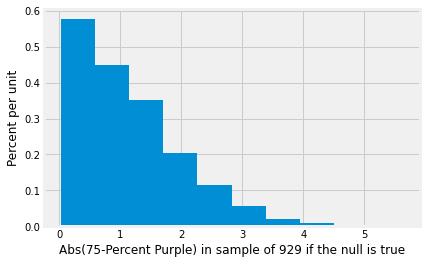

In [92]:
# Simulate 10,000 copies of the test statistic
num_simulations = 10000;

outcomes=[]

for i in np.arange(num_simulations):
    outcomes = np.append(outcomes, test_statistic_purple_flowers(929))

plt.hist(outcomes, density=True);

ax.set_axisbelow(True)
ax.grid(alpha=0.25)
plt.xlabel("Abs(75-Percent Purple) in sample of 929 if the null is true")
plt.ylabel("Percent per unit")



## Our Decision

In [95]:
#Compare to observed test statistic:
## Mendel had 929 plants, of which 709 had purple flowers

observed_purples = 709 / 929*100

observed_test_statistic=abs(observed_purples-75)
observed_test_statistic


1.318622174381062

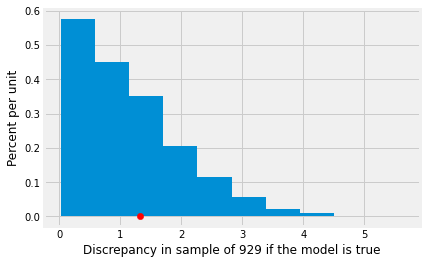

In [94]:
#Plot

plt.hist(outcomes, density=True);
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
plt.xlabel("Discrepancy in sample of 929 if the model is true")
plt.ylabel("Percent per unit")

plt.scatter(observed_test_statistic, -.0001, color="red", s=40)

In [101]:
# (1) Calculate the p-value: simulation area beyond observed value

sum(outcomes>=observed_test_statistic)/ num_simulations

# (2) See if this is less than 5% (or our initially chosen significance level)


0.3655

## Conclusion:  
Since 0.3655> 0.05, we FAIL TO REJECT the null hypothesis that the proportion of purple flowers is 0.75


## Alameda County Jury Panels ##

In [ ]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

In [ ]:
jury.barh('Ethnicity')

In [ ]:
# Under the model, this is the true distribution of people
# from which the jurors are randomly sampled
model = make_array(0.15, 0.18, 0.12, 0.54, 0.01)

In [ ]:
# Let's simulate a random draw of 1423 jurors from this distribution
simulated = sample_proportions(1423, model)
simulated

In [ ]:
# The actual observed distribution (Panels) looks quite different
# from the simulation -- try running this several times to confirm!
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

In [ ]:
jury_with_simulated.barh('Ethnicity')

## Distance Between Distributions

In [102]:
# In the last example, the difference between observed black/purple
# and their expected values (25%/75%) was our statistic.
#
# In this case, we need to understand how each of the 5 categories
# differ from their expected values according to the model.

diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

NameError: name 'jury' is not defined

## Total Variation Distance

In [ ]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [ ]:
# The TVD of our observed data (Panels) from their expected values
# assuming the model is true (Eligbible)
obsvd_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
obsvd_tvd

In [ ]:
# The TVD of a model simluation from its expected values
tvd(sample_proportions(1423, model), jury.column('Eligible'))

In [ ]:
def simulated_tvd():
    return tvd(sample_proportions(1423, model), model)

tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

In [ ]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

Table().with_column(title, tvds).hist(bins = bins)
print('Observed TVD: ' + str(obsvd_tvd))